In [19]:
#项目9-项目实施代码
#第一步：数据准备
import pandas as pd
#读取数据
names=['FilmName1','FilmName2']
dataset=pd.read_csv('FilmScore-data-y.txt',delimiter=',',names=names)
print('电影评分数据集')
print(dataset)

电影评分数据集
    FilmName1  FilmName2
0        4.74       7.44
1        5.88       7.52
2        3.99       7.12
3        3.55       7.55
4        3.23       6.12
..        ...        ...
95       7.85       6.81
96       9.17       5.13
97       5.87       3.95
98       8.41       5.02
99       8.87       5.44

[100 rows x 2 columns]


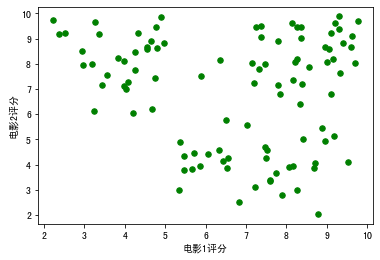

In [20]:
#第二步：数据可视化展示
import matplotlib.pyplot as plt

#提取电影评分数据
data=dataset.iloc[range(0,100),range(0,2)].values 
#使用Matplotlib绘制样本散点图
plt.scatter(data[:,0],data[:,1],s=30,c='g',marker='o')
#设置坐标轴的名称并显示图形
plt.rcParams['font.sans-serif']='Simhei'
plt.xlabel('电影1评分')
plt.ylabel('电影2评分')
plt.show()

In [21]:
#第三步：调节参数
#寻找k均值聚类算法的最优簇数目值
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score #导入calinski_harabasz指数评价模块

for i in range(2,10):   
    kmeans=KMeans(n_clusters = i,random_state=0)
    kmeans.fit(data)
    score_kmeans=calinski_harabasz_score(data,kmeans.labels_)
    print('数据聚%d类时，calinski_harabasz的值为：%f'%(i,score_kmeans))  

数据聚2类时，calinski_harabasz的值为：79.675122
数据聚3类时，calinski_harabasz的值为：191.591511
数据聚4类时，calinski_harabasz的值为：167.238037
数据聚5类时，calinski_harabasz的值为：155.935027
数据聚6类时，calinski_harabasz的值为：157.731186
数据聚7类时，calinski_harabasz的值为：151.251458
数据聚8类时，calinski_harabasz的值为：153.123040
数据聚9类时，calinski_harabasz的值为：160.855747


In [22]:
#第三步：调节参数
#寻找DBSCAN聚类算法中参数eps与参数min_samples的最优组合
import numpy as np
from sklearn.cluster import DBSCAN

eps=np.arange(0.2,4,0.2) #eps参数从0.2开始到4，每隔0.2进行一次
min_samples=np.arange(2,20,1)#min_samples参数取2到20的整数

best_score=0
best_score_eps=0
best_score_min_samples=0

#寻找最优参数组合
for i in eps:  
    for j in min_samples:
        try:  #try语句捕获异常
            db=DBSCAN(eps=i,min_samples=j).fit(data)
            labels=db.labels_#DBSCAN模型预测的标签
            k=calinski_harabasz_score(data,labels) #calinski_harabasz指数评价聚类的好坏，值越大越好
            
        except:
            db='' #跳过计算calinski_harabasz值时，出错的模型
        else:
            if k>best_score:
                best_score=k
                best_score_eps=i
                best_score_min_samples=j
print('calinski_harabasz的最大值为%f，对应的eps值为%.2f，min_samples值为%d'%(best_score,best_score_eps,best_score_min_samples))

calinski_harabasz的最大值为191.591511，对应的eps值为1.20，min_samples值为6


In [23]:
#第四步：训练与评估模型
#训练k均值聚类模型
KMeans=KMeans(n_clusters=3,random_state=0)  
KMeans.fit(data)

clusterCenters=KMeans.cluster_centers_#获取最终聚类中心值
labels_KMeans=KMeans.labels_#获取聚类标签值
print("最终聚类中心为：")
print(clusterCenters)
print("每类样本对应的类别标签为：")
print(labels_KMeans)

最终聚类中心为：
[[7.27205882 4.08029412]
 [8.42944444 8.42027778]
 [3.949      8.18666667]]
每类样本对应的类别标签为：
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]


In [24]:
#第四步：训练与评估模型
#训练凝聚层次聚类模型
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=3)
labels_ac=ac.fit_predict(data)
print("每类样本对应的类别标签为：")
print(labels_ac)

每类样本对应的类别标签为：
[2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]


In [25]:
#第四步：训练与评估模型
#训练DBSCAN聚类模型
db=DBSCAN(eps=1.2,min_samples=6)
db.fit(data)
labels_db=db.labels_
print("每类样本对应的类别标签为：")
print(labels_db)

每类样本对应的类别标签为：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1]


In [26]:
#第四步：训练与评估模型
#分别对训练完成的3个模型进行评估
names=['k均值','凝聚层次','DBSCAN']
labels=[labels_KMeans,labels_ac,labels_db]

for name,label in zip(names,labels):
    score=calinski_harabasz_score(data,label)
    print('%s聚类模型的calinski_harabasz值为：%s'%(name,score)) 

k均值聚类模型的calinski_harabasz值为：191.59151118025065
凝聚层次聚类模型的calinski_harabasz值为：188.10292146791565
DBSCAN聚类模型的calinski_harabasz值为：191.59151118025062


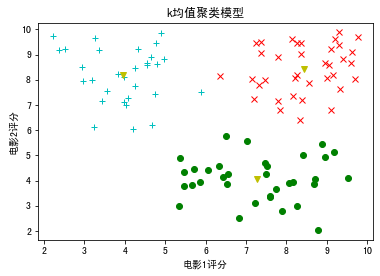

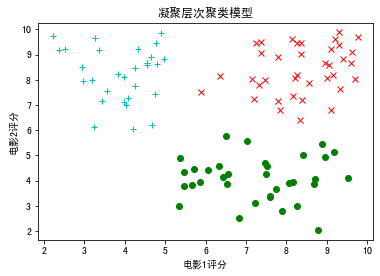

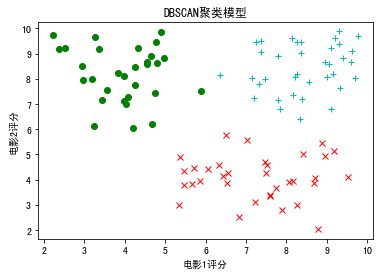

In [27]:
#第五步：显示聚类结果
#使用Matplotlib绘制图像，显示各个模型的聚类结果
colors=['g','r','c','y']
markers=['o','x','+','v']
for j in range(3):
    #绘制聚类结果图
    for i,l in enumerate(labels[j]):
        plt.plot(data[i][0],data[i][1],color=colors[l],marker=markers[l])
    if j==0:
        #使用倒三角绘制k均值模型的聚类中心点
        for i in range(3):
            plt.plot(clusterCenters[i][0],clusterCenters[i][1],color=colors[3],marker=markers[3])
    plt.rcParams['font.sans-serif']='Simhei'
    plt.xlabel('电影1评分')
    plt.ylabel('电影2评分')
    plt.title('%s聚类模型'%names[j])
    plt.show()